In [1]:
# import warning libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import neccessary libraries to read the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importing datetime library
import datetime as dt

In [4]:
# importing neccesary library for scaling
import sklearn
from sklearn.preprocessing import StandardScaler

In [5]:
#Importing neccessarly libraries for model building using KMeans
from sklearn.cluster import KMeans

# importing neccessary metrics for calculating optimal clusters
from sklearn.metrics import silhouette_score

In [6]:
# importing neccessary libraries for hiearchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Data Reading, Cleaning and Understanding

In [7]:
# Reading the data into dataframe
retail_dataframe = pd.read_csv('Online+Retail.csv', sep = ',', encoding = 'ISO-8859-1')

In [8]:
# analyzing the dataframe
retail_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


In [9]:
# checking the shape of the dataframe
retail_dataframe.shape

(541909, 8)

In [10]:
# checking the info of the dataframe
retail_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
# checking the describe of the dataframe
retail_dataframe.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# checking the data types of the dataframe
retail_dataframe.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [13]:
# checking the columns of the dataframe
retail_dataframe.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
# checking the missing values in dataframe
retail_dataframe.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
# checking the missing value percentages of the dataframe
round(100*(retail_dataframe.isnull().sum()/retail_dataframe.shape[0]),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

From above missing value percentages we can see there exists significant number of missing values in customer id and an insignificant number of missing values in description. Since the missing variables are both categorical variables imputing them with any mode function would be meaningless. Hence it is better to drop the missing rows.

In [16]:
# dropping missing rows of description
retail_dataframe = retail_dataframe[~retail_dataframe['Description'].isnull()]

In [17]:
# dropping missing rows of customer id
retail_dataframe = retail_dataframe[~retail_dataframe['CustomerID'].isnull()]

In [18]:
# checking the dataframe after dropping
retail_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom


In [19]:
# checking the shape of the dataframe after dropping
retail_dataframe.shape

(406829, 8)

### Data Preparation I

In data preparation the three most important variables needed to be taken into consideration of customer segmentation analysis are RFM(Recency, Frequency, Monetary value). Recency stands for when is the recent date the customer has shopped. Frequency stands for how frequently does the customer shop and Monetary value corresponds to total monetary value contributed by an customer. All the above three parameters are considered over a period of time. Also K means clustering technique works only on the numerical values hence these variables serves better in clustering process. 

In [20]:
# Create monetary value contributed by each customer

# create amount column in the dataframe
retail_dataframe['Amount'] = retail_dataframe['Quantity']*retail_dataframe['UnitPrice']

In [21]:
# checking the dataframe after column addition
retail_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom,20.34


In [22]:
# creating a grouped dataframe for monetary
monetary_series = retail_dataframe.groupby('CustomerID')['Amount'].sum()

# analyzing the monetary_series
monetary_series.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [23]:
# creating dataframe of monetary_series as we need customer ID as one of the column
monetary_dataframe = monetary_series.reset_index()

# analyzing the monetary dataframe
monetary_dataframe.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [24]:
# creating frequency variable
frequency_series = retail_dataframe.groupby('CustomerID')['InvoiceNo'].count()

# crearting frequency dataframe
frequency_dataframe = frequency_series.reset_index()

# analyzing the frequency dataframe
frequency_dataframe.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [25]:
# reading the dataframe of retail again
retail_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-10 8:26,3.39,17850.0,United Kingdom,20.34


In [26]:
# checking the info types of the variables again
retail_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


From the above info of the variables we can see that the datatype of the invoice date is in object form rather it should be in datetime datatype. Hence it is neccessary to convert the datatype to datetime format.

In [27]:
# converting the data type of invoice date
retail_dataframe['InvoiceDate'] = pd.to_datetime(retail_dataframe['InvoiceDate'], format = '%d-%m-%y %H:%M')

In [28]:
# checking the dataframe after conversion of datatype
retail_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [29]:
# checking the info of the dataframe
retail_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [30]:
# checking the max or latest date of purchase present in the dataframe
max_date = retail_dataframe['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [31]:
# create a datediff column in the dataframe
# difference between the max date and the invoice date
retail_dataframe['DateDiff'] = max_date - retail_dataframe['InvoiceDate']

In [32]:
# checking the dataframe
retail_dataframe.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,DateDiff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [33]:
# creating recency dataframe
recency_series = retail_dataframe.groupby('CustomerID')['DateDiff'].min()
recency_dataframe = recency_series.reset_index()
recency_dataframe.head()

,CustomerID,DateDiff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [34]:
# merge all three dataframes on customerID
group_dataframe = pd.merge(monetary_dataframe,frequency_dataframe, on = 'CustomerID', how = 'inner')

In [35]:
# checking the group dataframe after first merge
group_dataframe.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [36]:
# mereging group dataframe and recency dataframe
group_dataframe = pd.merge(group_dataframe,recency_dataframe,on ='CustomerID',how = 'inner')

In [37]:
# modifying the column names of the group dataframe
group_dataframe.columns = ['CustomerID','Monetary_Value','Frequency','Recency']

In [38]:
# checking the group dataframe
group_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


### Data Preparation II

- In the data preparation stage we will checking for the outliers if any to not to have any affect on clustering process.
- We rescale the numerical variables into common scale inorder to not to have any affect on clustering process.
- Check for cluster tendency using hopkins test metric and based on the metric value undestand whether the underlying data is suitable for clustering technique or not.

In [39]:
# reading the grouped dataframe again
group_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


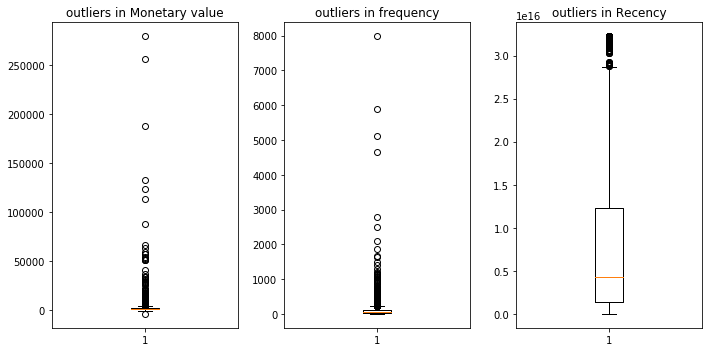

In [40]:
# checking for the outliers 
numerical_columns_list = list(group_dataframe.columns)[1::]
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.boxplot(group_dataframe[numerical_columns_list[0]])
plt.title('outliers in Monetary value')
plt.subplot(1,3,2)
plt.boxplot(group_dataframe[numerical_columns_list[1]])
plt.title('outliers in frequency')
plt.subplot(1,3,3)
plt.boxplot(group_dataframe[numerical_columns_list[2]])
plt.title('outliers in Recency')
plt.yscale('linear')
plt.tight_layout()
plt.show()

- Generally the possible identification of outliers are:
- Statistical identification: In this method we use methods like IQR and z score methods to identify the possible outliers
- Business point of view: In this case we go with the business point of view to check for the outliers.

In [41]:
# statistical method of outlier identification in Monetary_Value column
Q1 = group_dataframe['Monetary_Value'].quantile(0.05)
Q3 = group_dataframe['Monetary_Value'].quantile(0.95)
IQR = Q3 - Q1
lower_outlier_value = Q1 - 1.5*(IQR)
print(lower_outlier_value)
higher_outlier_value = Q3 + 1.5*(IQR)
print(higher_outlier_value)

-8184.659749999991
13910.802249999984


In [42]:
# checking for the outliers on Monetary_value column and removing them
group_dataframe = group_dataframe[(group_dataframe['Monetary_Value']>= lower_outlier_value) & (group_dataframe['Monetary_Value']<= higher_outlier_value)]

In [43]:
# removing outliers from Frequency
Q1 = group_dataframe['Frequency'].quantile(0.05)
Q3 = group_dataframe['Frequency'].quantile(0.95)
IQR = Q3 - Q1
lower_outlier_value = Q1 - 1.5*(IQR)
higher_outlier_value = Q3 + 1.5*(IQR)

In [44]:
# removing outliers from frequency column
group_dataframe = group_dataframe[(group_dataframe['Frequency']>= lower_outlier_value)&(group_dataframe['Frequency']<= higher_outlier_value)]

In [45]:
# removing outliers from recency
Q1 = group_dataframe['Recency'].quantile(0.05)
Q3 = group_dataframe['Recency'].quantile(0.95)
IQR = Q3 - Q1
lower_outlier_value = Q1 - 1.5*(IQR)
higher_outlier_value = Q3 + 1.5*(IQR)

In [46]:
# removing outliers from recency column
group_dataframe = group_dataframe[(group_dataframe['Recency']>= lower_outlier_value)&(group_dataframe['Recency']<= higher_outlier_value)]

In [47]:
# checking the shape of the grouped dataframe
group_dataframe.shape

(4293, 4)

In [48]:
# modifying the column Recency
group_dataframe['Recency'] = group_dataframe['Recency'].dt.days

In [49]:
# Reading the dataframe
group_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [50]:
original_dataframe = group_dataframe.copy()
original_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [51]:
# scaling the variables in the dataframe using StandardScaler

# intializing the scaler object
scaler = StandardScaler()

# fit and transform the dataframe on to the scaler object
group_dataframe.iloc[:,1:] = scaler.fit_transform(group_dataframe.iloc[:,1:])

C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
# checking the dataframe after scaling the features
group_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency
0,12346.0,-0.723738,-0.752888,2.301611
1,12347.0,1.731617,1.042467,-0.906466
2,12348.0,0.300128,-0.463636,-0.183658
3,12349.0,0.277517,-0.044720,-0.738141
4,12350.0,-0.533235,-0.603275,2.143188


In [53]:
# checking the cluster tendency of the dataframe through hopkins test

# copy pasting the code for hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [54]:
# calling the function to get the hopkins value
hopkins_value = hopkins(group_dataframe.iloc[:,1:])
hopkins_value

0.9543930006116811

- From above we can see that the hopkins value s very close to 1. So it is evident that the underlying the data is suitable for meaningful clustering. Hence it is an indication that the underlying data is not uniformly distributed or random or grid orientation like such. Hence it is meaning to do clustering on the dataset.
- It is better to run the hopkins test multiple times as it samples random samples from the dataset so each time it results in different hopkins value. So it is better to run the hopkins test multiple times and get to know whether in all iterations the hopkins value is close to 1 or not. Doing so it makes our result robust as well.

### Model building

- We start the model building by finding out the optimal number of clusters to be made.
- To calculate the optimal number of clusters to be formed we need to evaluvate using both qualitative business understanding and quantitative metric analysis using interia and silhouetee score.
- To find out quantitatively the optimal number of clusters through inertia we plot elbow curve which plotted wrt range of number of clusters and their sum of square distance of points wrt its cluster centers.
- To find out using silhouette analysis we compute silhouette score which is an measure to determine how close or similiar the points within the cluster and how far away or disimilar to each other from different clusters.
- silhouette score varies from -1 to 1. 1 or closer to 1 value indicates that that points within the cluster to cohesive to each other and seperated from nearest clusters. -1 or negative value indicates that the points within the cluster are not cohesive and between the clusters are also not much seperated to each other.
- In both the cases the point at which the properties are statisfied with business understanding as well the optimal number clusters are taken into consideration.

In [55]:
# reading the grouped dataframe
group_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency
0,12346.0,-0.723738,-0.752888,2.301611
1,12347.0,1.731617,1.042467,-0.906466
2,12348.0,0.300128,-0.463636,-0.183658
3,12349.0,0.277517,-0.044720,-0.738141
4,12350.0,-0.533235,-0.603275,2.143188


In [86]:
# installing module required for hopkins
!pip install pyclustertend

In [87]:
# importing neccessary libraries for hopkin's test
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [94]:
# checking the numerical columns of the dataframe
numerical_columns_list

['Monetary_Value', 'Frequency', 'Recency']

In [98]:
# checking only the numerical part of the dataframe
group_dataframe[numerical_columns_list].head()

,Monetary_Value,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [99]:
# checking the hopkins test statistics value of the dataframe
X = scale(group_dataframe[numerical_columns_list])
hopkins_value = hopkins(X,150)
# here 150 represents the sampling size considered while performing hopkins test on a dataframe to check the cluster tendency
hopkins_value

0.05007262055808451

In [57]:
# optimal number of clusters through elbow curve
range_n_clusters = list(range(2,10))
ssd_list = []
for i in range_n_clusters:
    # creating the KMeans model obhject
    kmeans_model = KMeans(n_clusters= i, max_iter = 100)
    
    # fitting the data on to the model object
    kmeans_model.fit(group_dataframe.iloc[:,1:])
    
    # appending the ssd values in a list for each of the cluster numbers
    ssd_list.append(kmeans_model.inertia_)

# checking the ssd list
ssd_list

[7661.70586932075,
 4433.580619302122,
 3360.717755590484,
 2802.8327372893214,
 2391.9620867548574,
 2039.2979741106776,
 1826.018907887329,
 1640.4810672385545]

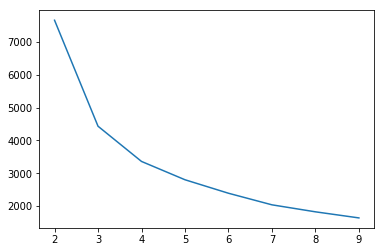

In [58]:
# plotting the eblow curve
plt.figure()
plt.plot(range_n_clusters,ssd_list)
plt.show()

- From the above elbow plot we can see that from clusters 2 to cluster 3 there has been drastic decrease in sum of square distances of the points within in their own clusters with their respective cluster centers. Generally the ssd value decreases as the number of clusters increases but the optimal point is considered as the point further much upon increase in number of cluster centers the value of ssd doesn't drastically decrease. Such point is considered as optimal number of clusters. Hence from the above plot we can see that 3 number of clusters are being considered as optimal value.

In [59]:
# estimating the optimal number of clusters using silhouette analysis
range_n_clusters = list(range(2,10))
silhouette_avg_list = []
for i in range_n_clusters:
    kmeans_model_1 = KMeans(n_clusters = i, max_iter= 100)
    kmeans_model_1.fit(group_dataframe.iloc[:,1:])
    cluster_labels = kmeans_model_1.labels_
    silhouette_avg_list.append(silhouette_score(group_dataframe.iloc[:,1:],cluster_labels))
# checking the silhouette_avg_list
silhouette_avg_list

[0.5415858652525395,
 0.5084896296141937,
 0.47782241003860476,
 0.4662700564189704,
 0.417731425549664,
 0.41774641949149033,
 0.40803935307450223,
 0.41808513098837025]

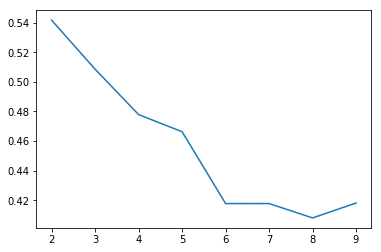

In [60]:
# plotting the silohouette plot
plt.figure()
plt.plot(range_n_clusters,silhouette_avg_list)
plt.show()

- Upon taking into consideration of both elbow curve and silhouette analysis it is better to consider the number of clusters to 3. Let's define the cluster labels to the group dataframe.

In [61]:
# creating final cluster model taking into consideration of optimal clusters to be 3
kmeans_final_model = KMeans(n_clusters = 3, max_iter= 100)
kmeans_final_model.fit(group_dataframe.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
# creating the array of cluster labels
kmeans_final_model.labels_

array([1, 0, 2, ..., 1, 2, 2])

In [63]:
# creating clusterid column in the group dataframe
group_dataframe['Cluster_id'] = kmeans_final_model.labels_

# analyzing the dataframe after addition of column
group_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency,Cluster_id
0,12346.0,-0.723738,-0.752888,2.301611,1
1,12347.0,1.731617,1.042467,-0.906466,0
2,12348.0,0.300128,-0.463636,-0.183658,2
3,12349.0,0.277517,-0.044720,-0.738141,2
4,12350.0,-0.533235,-0.603275,2.143188,1


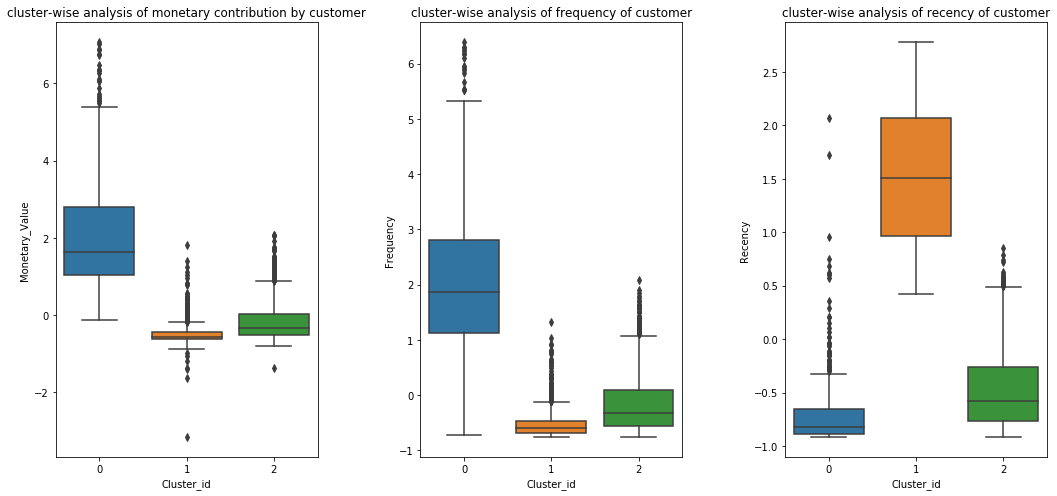

In [64]:
# plotting the variables cluster id wise
plt.figure(figsize= (15,7))
plt.subplot(1,3,1)
sns.boxplot(group_dataframe['Cluster_id'],group_dataframe['Monetary_Value'], data = group_dataframe)
plt.title('cluster-wise analysis of monetary contribution by customer')
plt.subplot(1,3,2)
sns.boxplot(group_dataframe['Cluster_id'],group_dataframe['Frequency'], data = group_dataframe)
plt.title('cluster-wise analysis of frequency of customer')
plt.subplot(1,3,3)
sns.boxplot(group_dataframe['Cluster_id'],group_dataframe['Recency'], data = group_dataframe)
plt.title('cluster-wise analysis of recency of customer')
plt.tight_layout()
plt.show()

In [65]:
# checking the original dataframe
original_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [66]:
# adding the column of cluster_ids to original dataframe
original_dataframe['Cluster_ids'] = kmeans_final_model.labels_

# checking the dataframe after column addition
original_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency,Cluster_ids
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


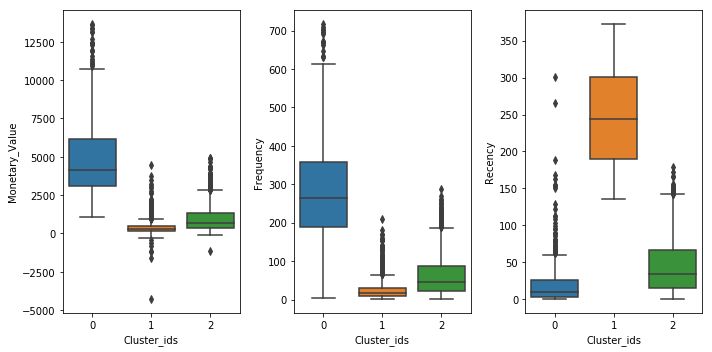

In [67]:
# plotting cluster wise for better interpretation
plt.figure(figsize= (10,5))
plt.subplot(1,3,1)
sns.boxplot(original_dataframe['Cluster_ids'],original_dataframe['Monetary_Value'], data = original_dataframe)
plt.subplot(1,3,2)
sns.boxplot(original_dataframe['Cluster_ids'],original_dataframe['Frequency'], data = original_dataframe)
plt.subplot(1,3,3)
sns.boxplot(original_dataframe['Cluster_ids'],original_dataframe['Recency'], data = original_dataframe)
plt.tight_layout()
plt.show()

- From tha above plot we can make following observations:
- cluster 0 customer contribute wider range of amount in purchasing the items when compared to customers in other clusters
- cluster 0 customers are the most frequent customers as the spread in frequency for customer in cluster 0 is wider when compared to other customers in other clusters
- cluster 0 customers also are the most recent customers who have made purchase when compared to other cluster customers.
- Hence in order to have an targeted action on the customers in different clusters it is better to target more the customer in cluster 0 first and the on customers in cluster 1.
- cluster 2 customers are the least monetary contributors, less frequent customers and also are the one how have shopped almost 200 days ago. Hence the customers in cluster 3 are the least significant customers.

- So far we have seen KMeans clustering technique which involves the stages of assignment and optimization happens iteratively mnay times in order to reach to optimum clustering process which implies that the cluster formed have tightness within the cluster and hugr inter cluster distance between the clusters. Some limitations with KMeans clustering are we need predetermine the number of clusters to be formed beforehand and also the intital cluster centers considered to be far way from each other inorder to have an efficient and faster convergence process. In order to overcome the limitation of determing the clusters beforehand we proceed with Hiearchieal clustering technique mpre particularly we perform Hiearchieal Algomerative clustering technique which involves stages of merging until all the observation have been mapped into one single cluster.

### Hiearchieal Clustering

- In order to perform Hierarchieal clustering the steps followed are:
- creating the dendrogram using any of the linkage clustering method the preferable one is complete linkage method
- Cut the dendrogram as per the requirement of number of clusters which statisfies the business criteria or considering any height or distance level.

In [68]:
# reading the scaled dataframe
group_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency,Cluster_id
0,12346.0,-0.723738,-0.752888,2.301611,1
1,12347.0,1.731617,1.042467,-0.906466,0
2,12348.0,0.300128,-0.463636,-0.183658,2
3,12349.0,0.277517,-0.044720,-0.738141,2
4,12350.0,-0.533235,-0.603275,2.143188,1


In [69]:
# analyzing the numerical columns
numerical_columns_list

['Monetary_Value', 'Frequency', 'Recency']

In [70]:
# analyzing the original dataframe
original_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency,Cluster_ids
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


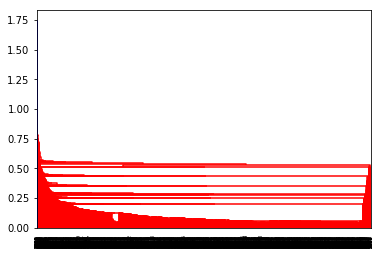

In [71]:
# Performing hierarchu clustering using single linkage process
single_linkage_model = linkage(group_dataframe[numerical_columns_list], method = 'single', metric= 'euclidean')

# plotting the dendogram which has been merged with matplotlib library
dendrogram(single_linkage_model)
plt.show()

- From above we can see the dendrogram which has been plotted when using single linkage as the distance measure to compute the distance between the clusters.
- Some of the drawbacks upon using single linkage clustering methods:
- The dendrogram which has been plotted is not interpretable.
- In single linkage method we will be considering the minimum distance between the clusters as the distance measure upon considering it results in loose cluster formation thereby the intra cluster distance will also be affected.
- Hence we often prefer to consider complete linkage or average linkage methods which yield better results.

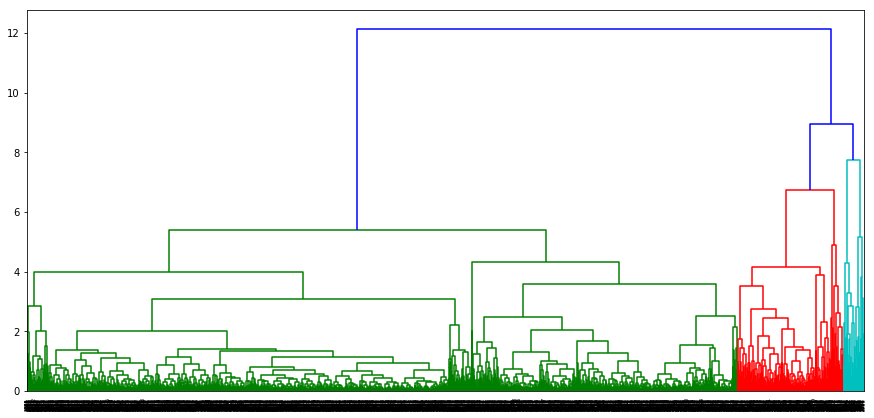

In [72]:
# Complete linkage clustering method
complete_linkage_model = linkage(group_dataframe[numerical_columns_list], method = 'complete', metric = 'euclidean')
# by default the metric will be euclidean

# plotting the dendrogram 
plt.figure(figsize= (15,7))
dendrogram(complete_linkage_model)
plt.show()

In [73]:
# Cutting the dendrogram
cluster_labels = cut_tree(complete_linkage_model, n_clusters= 3)
cluster_labels

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [74]:
# checking the shape of the cluster labels
cluster_labels.shape

(4293, 1)

- From above we can see that cluster labels is an array of 1 column and some 4293 rows. Which implies each element in the array is an 1D array. So frist we need to convert the array of arrays into single 1D array.

In [75]:
# reshaping the array
cluster_labels = cluster_labels.reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

- from the above we can see that the above cluster labels is now an 1D array.

In [76]:
# creating column in original and group dataframe
group_dataframe['Cluster_labels'] = cluster_labels
original_dataframe['Cluster_labels'] = cluster_labels

- Cluster_ids = represents the labels derived from KMeans 
- Cluster_labels = represents the labels dervied from Hierarchieal clustering

In [77]:
# checking the dataframes after addition of column
group_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency,Cluster_id,Cluster_labels
0,12346.0,-0.723738,-0.752888,2.301611,1,0
1,12347.0,1.731617,1.042467,-0.906466,0,1
2,12348.0,0.300128,-0.463636,-0.183658,2,0
3,12349.0,0.277517,-0.044720,-0.738141,2,0
4,12350.0,-0.533235,-0.603275,2.143188,1,0


In [78]:
original_dataframe.head()

,CustomerID,Monetary_Value,Frequency,Recency,Cluster_ids,Cluster_labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,2,0
3,12349.0,1757.55,73,18,2,0
4,12350.0,334.40,17,309,1,0


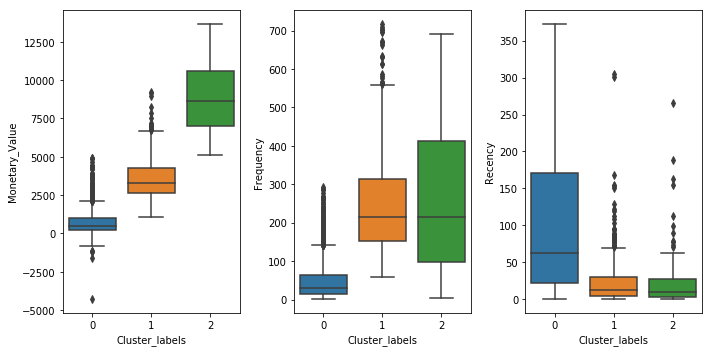

In [79]:
# visualizing different clusters from hierarchical clustering
plt.figure(figsize= (10,5))
plt.subplot(1,3,1)
sns.boxplot(original_dataframe['Cluster_labels'], original_dataframe['Monetary_Value'], data = original_dataframe)
plt.subplot(1,3,2)
sns.boxplot(original_dataframe['Cluster_labels'], original_dataframe['Frequency'], data = original_dataframe)
plt.subplot(1,3,3)
sns.boxplot(original_dataframe['Cluster_labels'], original_dataframe['Recency'], data = original_dataframe)
plt.tight_layout()
plt.show()

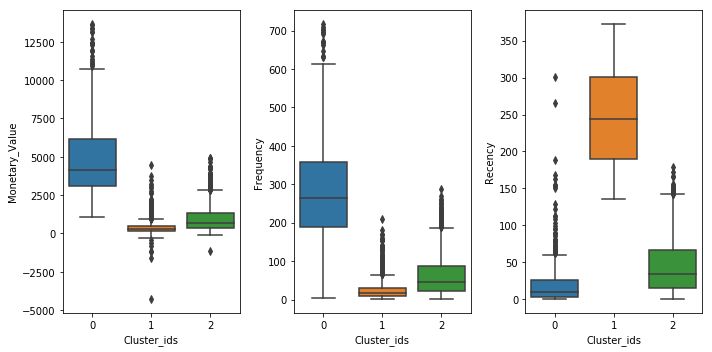

In [80]:
# clustering from KMeans
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.subplot(1,3,1)
sns.boxplot(original_dataframe['Cluster_ids'],original_dataframe['Monetary_Value'], data = original_dataframe)
plt.subplot(1,3,2)
sns.boxplot(original_dataframe['Cluster_ids'],original_dataframe['Frequency'], data = original_dataframe)
plt.subplot(1,3,3)
sns.boxplot(original_dataframe['Cluster_ids'],original_dataframe['Recency'], data = original_dataframe)
plt.tight_layout()
plt.show()